In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
import re
import sys
from pathlib import Path
import tempfile
import glob
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
def house_number_from_filename(filename):
    m = re.match(r'^house_(\d+)_[\da-zA-Z]+.hdf$', filename)
    if m is None:
        raise ValueError(f'unsupported filename format: {filename}')
    return int(m[1])

def experiment_name_from_filename(filename):
    m = re.match(r'^refit_(\w+).csv$', filename)
    if m is None:
        raise ValueError(f'unsupported filename format: {filename}')
    return m[1]

In [4]:
result_df = []
experiment_names = []
for path in glob.iglob('../results/refit_*.csv'):
    part = pd.read_csv(path, index_col=[0, 1])
    part.index.set_names(['file', 'machine_column'], inplace=True)
    experiment = experiment_name_from_filename(Path(path).name)
    result_df.append(part)
    experiment_names.append(experiment)
result_df = pd.concat(result_df, names=['experiment'], keys=experiment_names)

result_df.index = result_df.index.map(lambda x: (x[0], house_number_from_filename(x[1]), x[2]))
result_df.index.set_names('house', level='file', inplace=True)

refit_absolute_consumption = pd.read_csv('../data/refit_absolute_consumption.csv', index_col=0)
result_df['total_cons_power'] = result_df.join(refit_absolute_consumption)['total_cons_power']

result_df.sample(3)

,,,before,naive,educated_forward,upper_bound,produced_energy,days,total_cons_power
experiment,house,machine_column,,,,,,,
bsrn_8T,9,washing_machine_power,31.120066,31.521024,32.523618,33.688820,3.360828e+06,353.237315,11729.079522
bsrn_5T,10,washing_machine_power,45.570500,45.921209,48.174695,50.653764,3.347782e+06,347.557355,16740.414639
bsrn_10T,1,tumble_dryer_power,29.988632,30.015734,30.041295,30.173880,3.319741e+06,349.248188,10097.817999


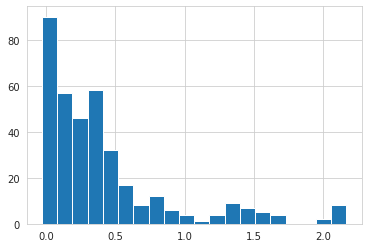

In [5]:
(result_df.naive - result_df.before).hist(bins=20);

In [6]:
result_df.groupby('experiment').mean()

,before,naive,educated_forward,upper_bound,produced_energy,days,total_cons_power
experiment,,,,,,,
bsrn_10T,35.231214,35.677321,36.797437,38.446627,3.306065e+06,346.312628,10806.959264
bsrn_1T,33.398261,33.780100,34.475029,36.793314,3.306198e+06,345.362245,10806.959264
bsrn_2T,33.803885,34.196976,35.116312,37.173574,3.306175e+06,345.803304,10806.959264
bsrn_3T,34.085679,34.489047,35.456138,37.433571,3.306146e+06,345.929800,10806.959264
bsrn_4T,34.317085,34.724656,35.734373,37.644020,3.306128e+06,346.004376,10806.959264
bsrn_5T,34.502797,34.921314,35.956810,37.810244,3.306248e+06,346.067592,10806.959264
bsrn_6T,34.677488,35.101164,36.141942,37.963613,3.306197e+06,346.133376,10806.959264
bsrn_7T,34.836577,35.266116,36.333065,38.104743,3.306058e+06,346.194913,10806.959264
bsrn_8T,34.974794,35.410890,36.489938,38.224166,3.305743e+06,346.230873,10806.959264


In [7]:
(result_df.naive - result_df.before).groupby('experiment').mean()

experiment
bsrn_10T    0.446107
bsrn_1T     0.381839
bsrn_2T     0.393091
bsrn_3T     0.403369
bsrn_4T     0.407572
bsrn_5T     0.418517
bsrn_6T     0.423675
bsrn_7T     0.429539
bsrn_8T     0.436096
bsrn_9T     0.444779
dtype: float64

In [8]:
(result_df.educated_forward - result_df.before).groupby('experiment').mean()

experiment
bsrn_10T    1.566223
bsrn_1T     1.076768
bsrn_2T     1.312426
bsrn_3T     1.370460
bsrn_4T     1.417288
bsrn_5T     1.454013
bsrn_6T     1.464454
bsrn_7T     1.496488
bsrn_8T     1.515144
bsrn_9T     1.550717
dtype: float64

In [9]:
(
    (result_df.naive - result_df.before) /
    (result_df.upper_bound - result_df.before)
).groupby('experiment').mean()

experiment
bsrn_10T    0.140213
bsrn_1T     0.114982
bsrn_2T     0.118735
bsrn_3T     0.123174
bsrn_4T     0.125116
bsrn_5T     0.129290
bsrn_6T     0.131790
bsrn_7T     0.135361
bsrn_8T     0.135630
bsrn_9T     0.139085
dtype: float64

In [10]:
(
    (result_df.educated_forward - result_df.before) /
    (result_df.upper_bound - result_df.before)
).groupby('experiment').mean()

experiment
bsrn_10T    0.489251
bsrn_1T     0.303680
bsrn_2T     0.388740
bsrn_3T     0.410564
bsrn_4T     0.425776
bsrn_5T     0.440695
bsrn_6T     0.445004
bsrn_7T     0.456143
bsrn_8T     0.466661
bsrn_9T     0.475502
dtype: float64

In [11]:
((result_df.naive - result_df.before) / result_df.before).groupby('experiment').mean()

experiment
bsrn_10T    0.012986
bsrn_1T     0.011950
bsrn_2T     0.012100
bsrn_3T     0.012289
bsrn_4T     0.012308
bsrn_5T     0.012542
bsrn_6T     0.012606
bsrn_7T     0.012675
bsrn_8T     0.012808
bsrn_9T     0.012969
dtype: float64

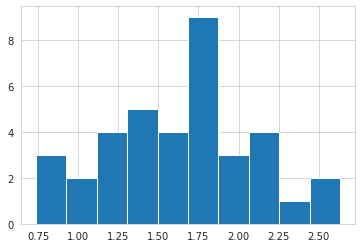

In [12]:
temp = result_df.upper_bound.groupby(['house', 'machine_column']).agg(['min', 'max'])
(temp['max'] - temp['min']).hist();

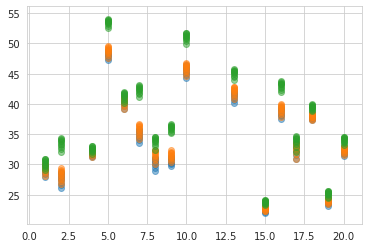

In [13]:
temp = result_df.groupby(['experiment', 'house']).mean()
temp = temp.sort_index(level='house')
plt.scatter(temp.index.get_level_values('house'), temp.before, alpha=0.5)
plt.scatter(temp.index.get_level_values('house'), temp.naive, alpha=0.5)
plt.scatter(temp.index.get_level_values('house'), temp.upper_bound, alpha=0.5);

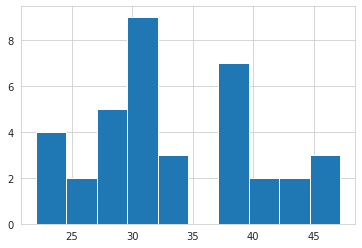

In [14]:
result_df.xs('bsrn_1T', level='experiment').before.hist();

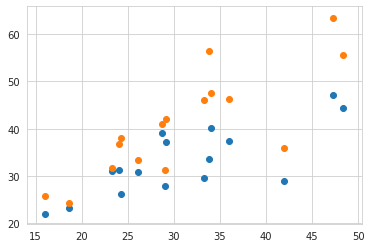

In [15]:
temp = result_df.copy()
temp.upper_bound -= temp.before
temp = temp.xs('bsrn_1T', level='experiment').groupby('house').agg({
    'before': 'mean',
    'upper_bound': 'sum',
    'days': 'mean',
    'total_cons_power': 'mean',
})
temp.upper_bound += temp.before
plt.scatter(temp.total_cons_power / temp.days, temp.before)
plt.scatter(temp.total_cons_power / temp.days, temp.upper_bound);

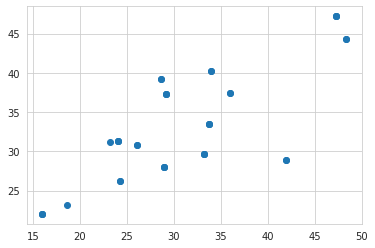

In [16]:
temp = result_df.xs('bsrn_1T', level='experiment')
plt.scatter(temp.total_cons_power / temp.days, temp.before);

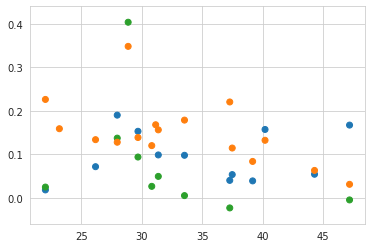

In [17]:
temp = result_df.xs('bsrn_1T', level='experiment')
plt.scatter(
    temp.before,
    (temp.naive - temp.before) / (temp.upper_bound - temp.before),
    c=temp.index.get_level_values('machine_column').map({
        'dishwasher_power': 'C0',
        'washing_machine_power': 'C1',
        'tumble_dryer_power': 'C2',
    }),
);

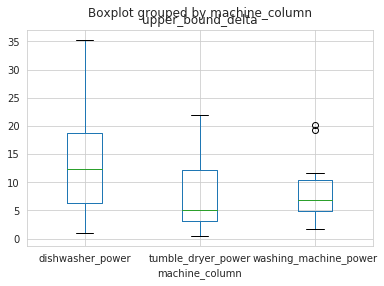

In [18]:
temp = result_df.xs('bsrn_1T', level='experiment').copy()
temp['upper_bound_delta'] = (temp.upper_bound - temp.before) / temp.before * 100
temp.boxplot('upper_bound_delta', 'machine_column');

In [19]:
# Convert relative self consumption to mean Wh/day.
# I could not find a nicer way to do this multiplication with a multiindex.
result_df_abs = pd.DataFrame(
    result_df.values / 100 * (result_df.produced_energy.values / result_df.days.values)[:, np.newaxis],
    index=result_df.index,
    columns=result_df.columns,
)[['before', 'naive', 'educated_forward', 'upper_bound']]
result_df_abs

before        naive  \
experiment house machine_column                                    
bsrn_3T    1     dishwasher_power       2727.266456  2759.054201   
                 tumble_dryer_power     2727.266456  2730.139340   
                 washing_machine_power  2727.266456  2747.042617   
           7     dishwasher_power       3259.542325  3346.707698   
                 tumble_dryer_power     3259.542325  3267.976874   
...                                             ...          ...   
bsrn_1T    2     dishwasher_power       2520.219082  2583.859409   
                 washing_machine_power  2520.219082  2554.587026   
           20    dishwasher_power       2984.972555  3004.215701   
                 tumble_dryer_power     2984.972555  2995.758601   
                 washing_machine_power  2984.972555  3001.986423   

                                        educated_forward  upper_bound  
experiment house machine_column                                        
bsrn_3T    1     dishwasher_power            2782.206439  2870.036237  
                 tumble_dryer_power          2732.423643  2746.664262  
                 washing_machine_power       2764.876851  2864.392277  
           7     dishwasher_power            3672.203518  4103.759648  
                 tumble_dryer_power          3448.676912  3948.472898  
...                                                  ...          ...  
bsrn_1T    2     dishwasher_power            2884.222185  3409.249719  
                 washing_machine_power       2608.259565  2777.173074  
           20    dishwasher_power            3070.525982  3180.132103  
                 tumble_dryer_power          3039.812322  3203.923659  
                 washing_machine_power       3020.187484  3093.817195  

[370 rows x 4 columns]

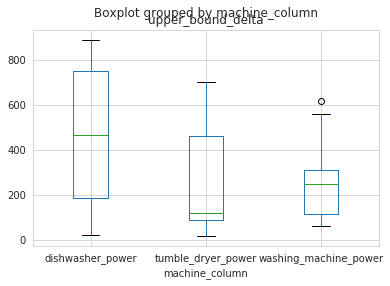

In [20]:
temp = result_df_abs.xs('bsrn_1T', level='experiment').copy()
temp['upper_bound_delta'] = temp.upper_bound - temp.before
temp.boxplot('upper_bound_delta', 'machine_column');

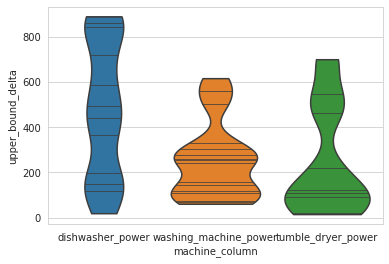

In [21]:
temp = result_df_abs.xs('bsrn_1T', level='experiment').copy()
temp['upper_bound_delta'] = temp.upper_bound - temp.before
sns.violinplot(
    data=temp,
    x=temp.index.get_level_values('machine_column'),
    y='upper_bound_delta',
    inner='stick',
    bw=0.3,
    cut=0,
);

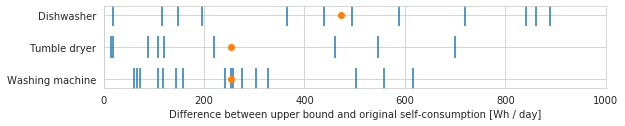

In [22]:
fig, ax = plt.subplots(figsize=(9, 1.5))

temp = result_df_abs.xs('bsrn_1T', level='experiment').copy()
temp['upper_bound_delta'] = temp.upper_bound - temp.before
ax.set_xlim(0, round(temp.upper_bound_delta.max() / 100 + 1) * 100)
temp.sort_index(axis=0, level='machine_column', inplace=True, ascending=False)

def get_machine_names(df):
    return df.index.get_level_values('machine_column').map({
        'dishwasher_power': 'Dishwasher',
        'tumble_dryer_power': 'Tumble dryer',
        'washing_machine_power': 'Washing machine',
    })

plt.scatter(
    temp['upper_bound_delta'],
    get_machine_names(temp),
    marker='|',
    s=500,
);

temp = temp.groupby('machine_column').mean()
plt.scatter(
    temp['upper_bound_delta'],
    get_machine_names(temp),
);
ax.set_xlabel('Difference between upper bound and original self-consumption [Wh / day]')

fig.savefig('/tmp/upper_bound_absolute_improvements.pdf', bbox_inches='tight')

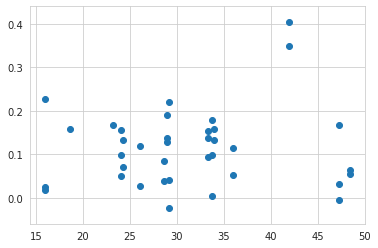

In [23]:
temp = result_df.xs('bsrn_1T', level='experiment')
plt.scatter(temp.total_cons_power / temp.days, (temp.naive - temp.before) / (temp.upper_bound - temp.before));

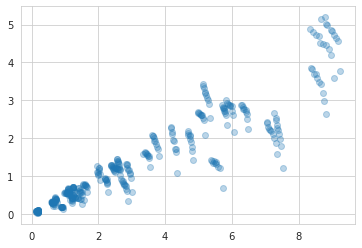

In [24]:
plt.scatter(
    result_df.upper_bound - result_df.before,
    result_df.educated_forward - result_df.before,
    alpha=0.3,
);

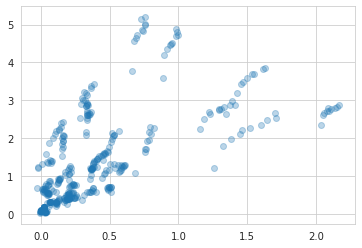

In [25]:
plt.scatter(
    result_df.naive - result_df.before,
    result_df.educated_forward - result_df.before,
    alpha=0.3,
);

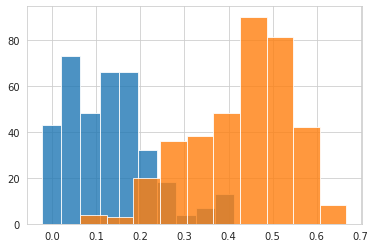

In [26]:
fig, ax = plt.subplots()
for col in ['naive', 'educated_forward']:
    ((result_df[col] - result_df.before) / (result_df.upper_bound - result_df.before)).hist(ax=ax, alpha=0.8)

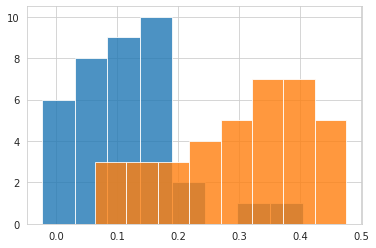

In [27]:
temp = result_df.xs('bsrn_1T', level='experiment')
fig, ax = plt.subplots()
for col in ['naive', 'educated_forward']:
    ((temp[col] - temp.before) / (temp.upper_bound - temp.before)).hist(ax=ax, alpha=0.8, bins=8)

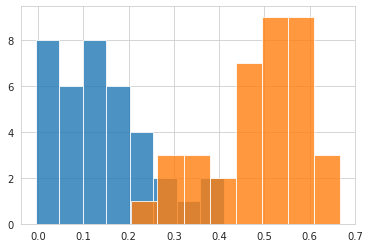

In [28]:
temp = result_df.xs('bsrn_10T', level='experiment')
fig, ax = plt.subplots()
for col in ['naive', 'educated_forward']:
    ((temp[col] - temp.before) / (temp.upper_bound - temp.before)).hist(ax=ax, alpha=0.8, bins=8)

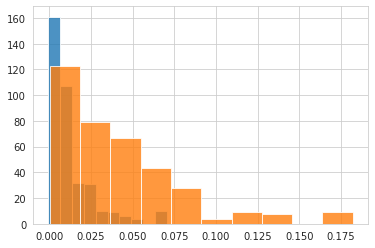

In [29]:
fig, ax = plt.subplots()
for col in ['naive', 'educated_forward']:
    ((result_df[col] - result_df.before) / result_df.before).hist(ax=ax, alpha=0.8)

In [30]:
(result_df.educated_forward < result_df.before).groupby('experiment').mean()

experiment
bsrn_10T    False
bsrn_1T     False
bsrn_2T     False
bsrn_3T     False
bsrn_4T     False
bsrn_5T     False
bsrn_6T     False
bsrn_7T     False
bsrn_8T     False
bsrn_9T     False
dtype: bool

In [31]:
(result_df.naive < result_df.before).groupby('experiment').mean()

experiment
bsrn_10T    0.027027
bsrn_1T     0.054054
bsrn_2T     0.054054
bsrn_3T     0.054054
bsrn_4T     0.027027
bsrn_5T     0.027027
bsrn_6T     0.000000
bsrn_7T     0.000000
bsrn_8T     0.000000
bsrn_9T     0.000000
dtype: float64

In [32]:
(result_df.educated_forward < result_df.before).groupby('house').mean()

house
1     False
2     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

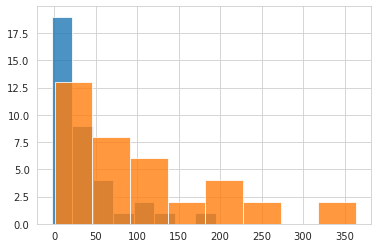

In [33]:
temp = result_df_abs.xs('bsrn_1T', level='experiment')
fig, ax = plt.subplots()
for col in ['naive', 'educated_forward']:
    (temp[col] - temp.before).hist(ax=ax, alpha=0.8, bins=8)

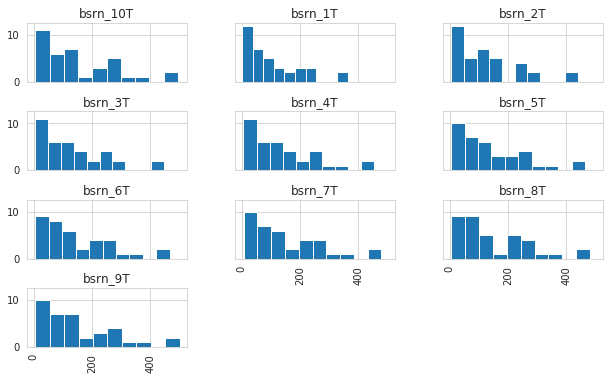

In [34]:
(result_df_abs.educated_forward - result_df_abs.before).hist(by='experiment', figsize=(10, 6), sharex=True, sharey=True);

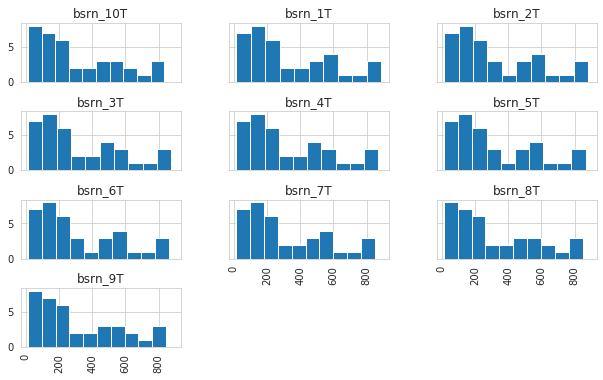

In [35]:
(result_df_abs.upper_bound - result_df_abs.before).hist(by='experiment', figsize=(10, 6), sharex=True, sharey=True);

In [36]:
result_df_abs[(result_df_abs.upper_bound - result_df_abs.before) < 100].xs('bsrn_10T', level='experiment')

before        naive  educated_forward  \
house machine_column                                                      
6     dishwasher_power       3940.051504  3945.268378       3993.454974   
      washing_machine_power  3940.051504  3946.097338       3970.783575   
17    tumble_dryer_power     3182.210680  3184.560754       3199.404057   
1     tumble_dryer_power     2850.536766  2853.112982       2855.542603   
15    dishwasher_power       2209.007887  2209.418478       2218.494121   
18    tumble_dryer_power     3680.148151  3680.085158       3688.130539   
      washing_machine_power  3680.148151  3700.983952       3721.795105   
4     washing_machine_power  3083.689835  3095.457325       3116.663669   
20    washing_machine_power  3119.521191  3141.681218       3172.829609   

                             upper_bound  
house machine_column                      
6     dishwasher_power       4031.823369  
      washing_machine_power  3998.404554  
17    tumble_dryer_power     3265.577462  
1     tumble_dryer_power     2868.145361  
15    dishwasher_power       2226.850548  
18    tumble_dryer_power     3693.373210  
      washing_machine_power  3746.048402  
4     washing_machine_power  3140.417753  
20    washing_machine_power  3217.999638

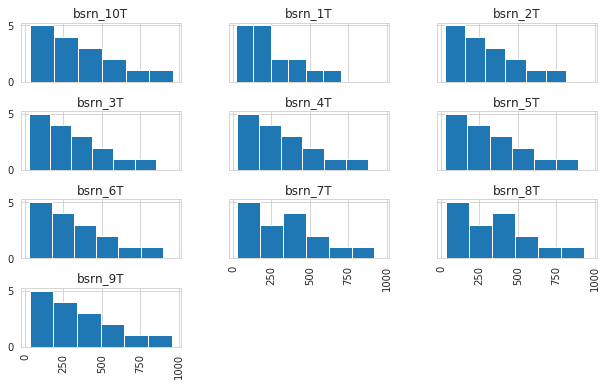

In [37]:
temp = (result_df_abs.educated_forward - result_df_abs.before).groupby(['experiment', 'house']).sum()
temp.hist(by='experiment', figsize=(10, 6), sharex=True, sharey=True, bins=6);

In [38]:
(result_df_abs.educated_forward - result_df_abs.before).groupby(['house', 'experiment']).sum().groupby('experiment').agg(['mean', 'median'])

,mean,median
experiment,,
bsrn_10T,345.585899,296.014709
bsrn_1T,238.033280,176.698510
bsrn_2T,289.926338,239.846368
bsrn_3T,302.634838,255.688597
bsrn_4T,312.895454,260.587936
bsrn_5T,321.006586,280.347435
bsrn_6T,323.249181,273.651248
bsrn_7T,330.318785,286.773021
bsrn_8T,334.393829,288.048275


In [39]:
(result_df_abs.educated_forward - result_df_abs.before).groupby('experiment').agg(['mean', 'median'])

,mean,median
experiment,,
bsrn_10T,149.442551,114.113034
bsrn_1T,102.933310,64.421358
bsrn_2T,125.373552,100.872916
bsrn_3T,130.869119,109.273505
bsrn_4T,135.306142,113.017124
bsrn_5T,138.813659,115.168127
bsrn_6T,139.783430,114.992112
bsrn_7T,142.840556,116.828416
bsrn_8T,144.602737,116.972410


In [40]:
(result_df_abs.naive - result_df_abs.before).groupby('experiment').agg(['mean', 'median'])

,mean,median
experiment,,
bsrn_10T,42.599546,24.171243
bsrn_1T,36.580405,19.243146
bsrn_2T,37.615658,19.604695
bsrn_3T,38.579109,19.855572
bsrn_4T,38.970475,20.870564
bsrn_5T,40.005047,22.766071
bsrn_6T,40.493166,23.001796
bsrn_7T,41.049355,23.482193
bsrn_8T,41.659274,24.914927


In [41]:
(result_df_abs.upper_bound - result_df_abs.before).groupby('experiment').agg(['mean', 'median'])

,mean,median
experiment,,
bsrn_10T,306.755272,234.849007
bsrn_1T,324.846429,252.825625
bsrn_2T,321.976791,251.713832
bsrn_3T,319.764820,250.723566
bsrn_4T,317.686489,249.168723
bsrn_5T,315.777727,247.266758
bsrn_6T,313.676367,244.743344
bsrn_7T,311.917099,242.147245
bsrn_8T,310.065494,239.778509


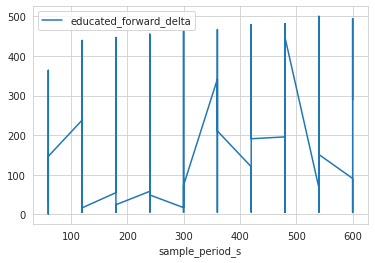

In [42]:
def sample_period_s_from_experiment_name(name):
    m = re.match(r'^bsrn_(\d+[a-zA-Z]+)$', name)
    if m is None:
        raise ValueError('unsupported experiment name format')
    return pd.Timedelta(m[1]).total_seconds()

temp = pd.DataFrame({
    'educated_forward_delta': result_df_abs.educated_forward - result_df_abs.before,
    'sample_period_s': result_df_abs.index.get_level_values('experiment').map(sample_period_s_from_experiment_name),
})
temp = temp.sort_values('sample_period_s')
temp.plot('sample_period_s', 'educated_forward_delta');

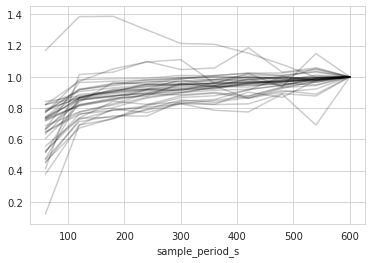

In [43]:
temp = result_df_abs.educated_forward - result_df_abs.before
temp = temp.unstack('experiment').reset_index(drop=True).T
temp /= temp.loc['bsrn_10T']
temp.index = temp.index.map(sample_period_s_from_experiment_name)
temp.index.name = 'sample_period_s'
temp = temp.sort_index()
temp.plot(legend=False, alpha=0.2, c='black');

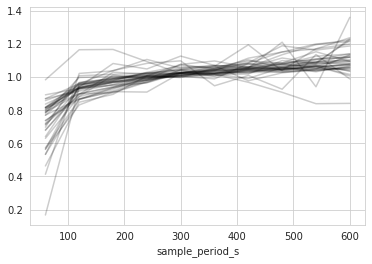

In [44]:
temp = result_df_abs.educated_forward - result_df_abs.before
temp = temp.unstack('experiment').reset_index(drop=True).T
temp /= temp.mean()
temp.index = temp.index.map(sample_period_s_from_experiment_name)
temp.index.name = 'sample_period_s'
temp = temp.sort_index()
temp.plot(legend=False, alpha=0.2, c='black');

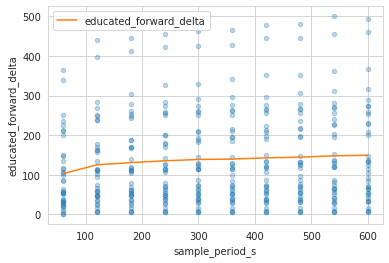

In [45]:
temp = pd.DataFrame({
    'educated_forward_delta': result_df_abs.educated_forward - result_df_abs.before,
    'sample_period_s': result_df_abs.index.get_level_values('experiment').map(sample_period_s_from_experiment_name),
})

fig, ax = plt.subplots()
temp.plot.scatter('sample_period_s', 'educated_forward_delta', alpha=0.3, ax=ax)
temp.groupby('sample_period_s').mean().plot(ax=ax, c='C1');

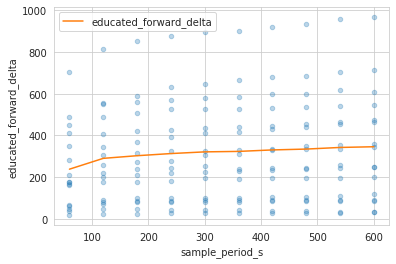

In [46]:
temp = result_df_abs.groupby(['house', 'experiment']).sum()
temp = pd.DataFrame({
    'educated_forward_delta': temp.educated_forward - temp.before,
    'sample_period_s': temp.index.get_level_values('experiment').map(sample_period_s_from_experiment_name),
})

fig, ax = plt.subplots()
temp.plot.scatter('sample_period_s', 'educated_forward_delta', alpha=0.3, ax=ax)
temp.groupby('sample_period_s').mean().plot(ax=ax, c='C1');

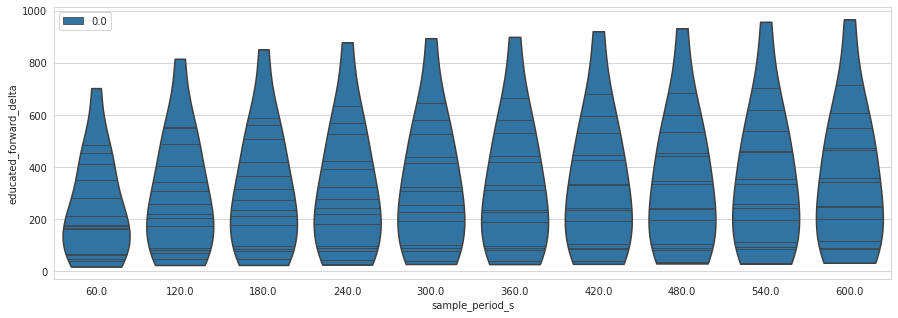

In [47]:
temp = result_df_abs.groupby(['house', 'experiment']).sum()
temp = pd.DataFrame({
    'educated_forward_delta': temp.educated_forward - temp.before,
    'sample_period_s': temp.index.get_level_values('experiment').map(sample_period_s_from_experiment_name),
})

fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(
    data=temp,
    x='sample_period_s',
    y='educated_forward_delta',
    hue=np.zeros(len(temp)),
    cut=0,
    inner='stick',
);

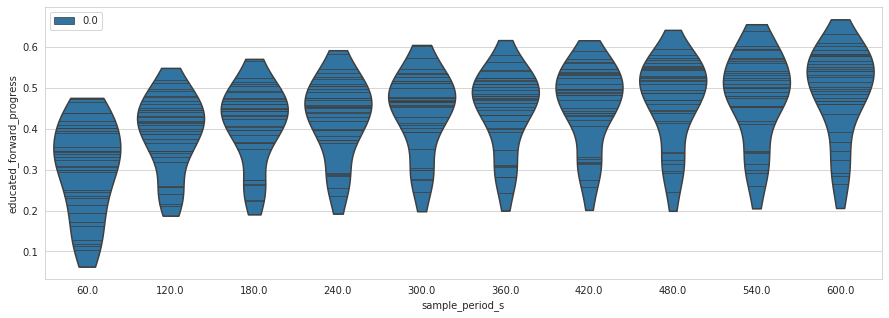

In [48]:
temp = result_df
temp = pd.DataFrame({
    'educated_forward_progress': (temp.educated_forward - temp.before) / (temp.upper_bound - temp.before),
    'sample_period_s': temp.index.get_level_values('experiment').map(sample_period_s_from_experiment_name),
})

fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(
    data=temp,
    x='sample_period_s',
    y='educated_forward_progress',
    hue=np.zeros(len(temp)),
    cut=0,
    inner='stick',
);

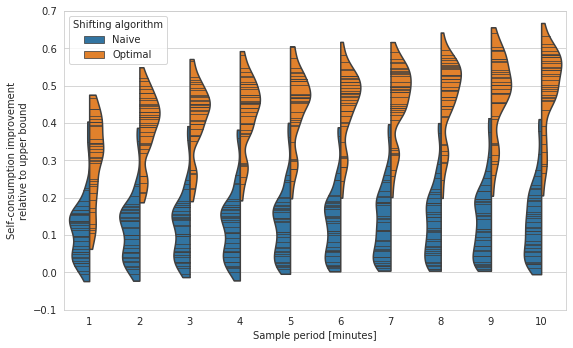

In [49]:
temp = result_df
temp = pd.concat([
    pd.DataFrame({
        'progress': (temp[col] - temp.before) / (temp.upper_bound - temp.before),
        'sample_period_minutes': temp.index.get_level_values('experiment').map(sample_period_s_from_experiment_name) / 60,
    })
    for col in ['naive', 'educated_forward']
], keys=['naive', 'educated_forward'], names=['algorithm'])

fig, ax = plt.subplots(figsize=(9, 5.5))
fig.add_gridspec(1, 2) # HACK enables grid lines
sns.violinplot(
    data=temp,
    x='sample_period_minutes',
    y='progress',
    hue=temp.index.get_level_values('algorithm').map({'naive': 'Naive', 'educated_forward': 'Optimal'}),
    cut=0,
    inner='stick',
    split=True,
    bw=0.3,
);
ax.set_xlabel('Sample period [minutes]')
plt.xticks(range(10), [f'{i + 1}' for i in range(10)]);
ax.set_ylabel('Self-consumption improvement\nrelative to upper bound')
ax.set_ylim(-0.1, 0.7)
ax.legend().set_title('Shifting algorithm')

fig.savefig('/tmp/improvement_distribution_by_sample_rate.pdf', bbox_inches='tight')

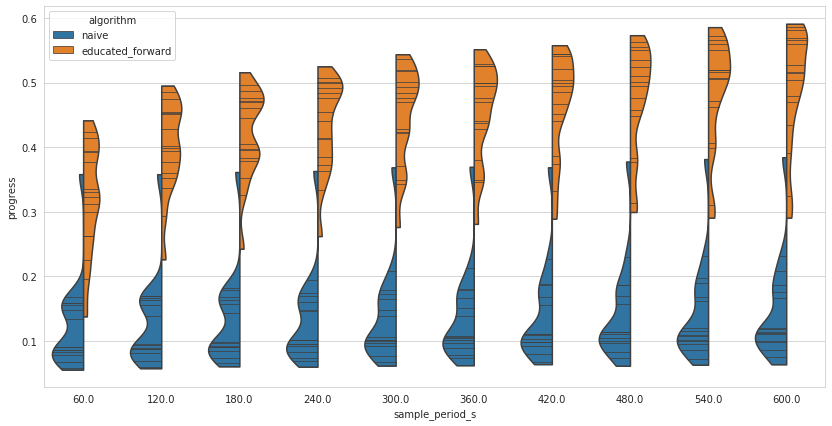

In [50]:
temp = result_df.groupby(['experiment', 'house']).sum()
temp = pd.concat([
    pd.DataFrame({
        'progress': (temp[col] - temp.before) / (temp.upper_bound - temp.before),
        'sample_period_s': temp.index.get_level_values('experiment').map(sample_period_s_from_experiment_name),
    })
    for col in ['naive', 'educated_forward']
], keys=['naive', 'educated_forward'], names=['algorithm'])

fig, ax = plt.subplots(figsize=(14, 7))
fig.add_gridspec(1, 0) # HACK enables grid lines
sns.violinplot(
    data=temp,
    x='sample_period_s',
    y='progress',
    hue=temp.index.get_level_values('algorithm'),
    cut=0,
    inner='stick',
    split=True,
    bw=0.3,
);

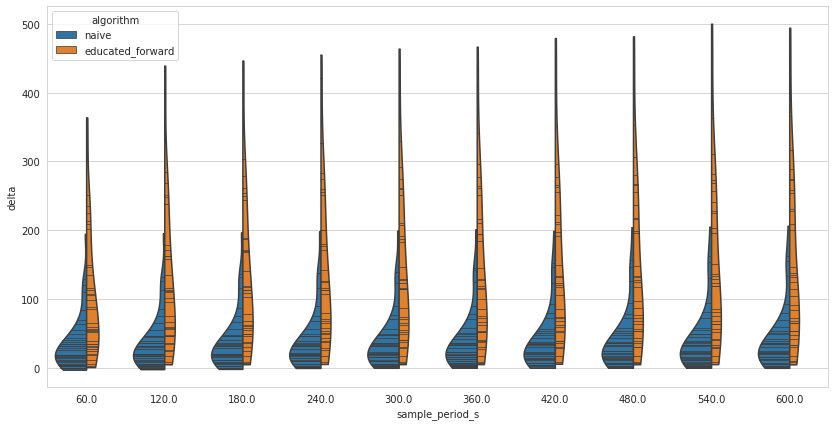

In [51]:
temp = result_df_abs
temp = pd.concat([
    pd.DataFrame({
        'delta': temp[col] - temp.before,
        'sample_period_s': temp.index.get_level_values('experiment').map(sample_period_s_from_experiment_name),
    })
    for col in ['naive', 'educated_forward']
], keys=['naive', 'educated_forward'], names=['algorithm'])

fig, ax = plt.subplots(figsize=(14, 7))
fig.add_gridspec(1, 0) # HACK enables grid lines
sns.violinplot(
    data=temp,
    x='sample_period_s',
    y='delta',
    hue=temp.index.get_level_values('algorithm'),
    cut=0,
    inner='stick',
    split=True,
);

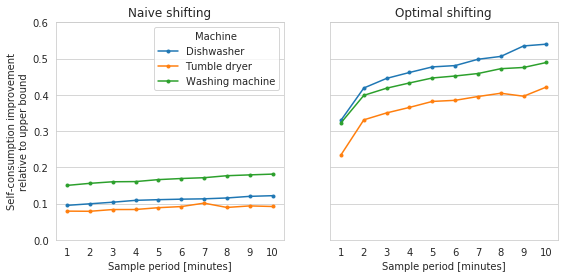

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

for i, (algorithm, title) in enumerate([('naive', 'Naive shifting'), ('educated_forward', 'Optimal shifting')]):
    temp = result_df
    temp = pd.DataFrame({
        'progress': (temp[algorithm] - temp.before) / (temp.upper_bound - temp.before),
        'sample_period_minutes': temp.index.get_level_values('experiment').map(sample_period_s_from_experiment_name) / 60,
    })
    temp = temp.groupby(['sample_period_minutes', 'machine_column']).mean().progress.unstack('machine_column')
    temp = temp.rename(columns={
        'dishwasher_power': 'Dishwasher',
        'tumble_dryer_power': 'Tumble dryer',
        'washing_machine_power': 'Washing machine',
    })
    temp.sort_index(axis=1, inplace=True)

    temp.plot(title=title, style='.-', ax=ax[i], xticks=range(1, 11))
    ax[i].set_xlabel('Sample period [minutes]')
    ax[i].set_xlim(0.5, 10.5)
    ax[i].xaxis.grid(False)
    ax[i].set_ylabel('Self-consumption improvement\nrelative to upper bound')
    ax[i].set_ylim(0, 0.6)
    ax[i].legend().set_title('Machine')
    
ax[i].legend().remove()

fig.savefig('/tmp/sample_rate_influence_by_machine.pdf', bbox_inches='tight')

In [83]:
def only_experiment_index(df):
    return df.reset_index(['house', 'machine_column'], drop=True)

groups = {
    'Upper bound (a)': result_df_abs.upper_bound - result_df_abs.before,
    'Naive (a)': result_df_abs.naive - result_df_abs.before,
    'Optimal (a)': result_df_abs.educated_forward - result_df_abs.before,
    'Naive (r)': (result_df_abs.naive - result_df_abs.before) / (result_df_abs.upper_bound - result_df_abs.before),
    'Optimal (r)': (result_df_abs.educated_forward - result_df_abs.before) / (result_df_abs.upper_bound - result_df_abs.before),
}

temp = pd.concat(groups).unstack(level=0).groupby('experiment').agg(['mean', 'median'])
temp.index = temp.index.map(lambda x: sample_period_s_from_experiment_name(x) / 60).rename('Sample period [minutes]').astype(np.int)
temp.columns.set_levels(['Mean', 'Median'], level=-1, inplace=True)
temp.sort_index(inplace=True)
temp.to_latex("/tmp/table_main.tex", float_format="%#.3g")